In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


Load the dataset & Display basic information

In [108]:
heart_df = pd.read_csv(r"C:\Users\hp\Desktop\ML\DataSet\heart.csv")
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [109]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [110]:
heart_df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [111]:
heart_df.shape

(1025, 14)

In [112]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [113]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [114]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Exploratory Analysis

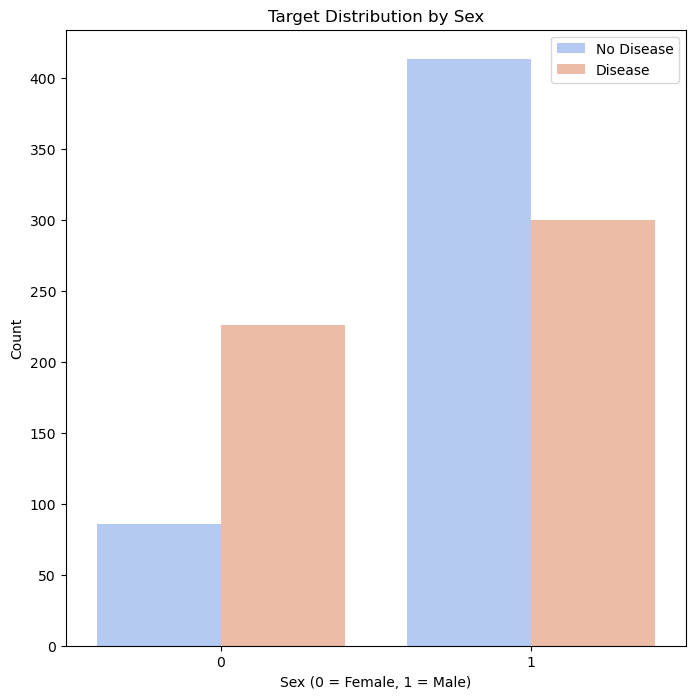

In [115]:
# Target vs. Sex
plt.figure(figsize=(8, 8))
sns.countplot(x="sex", hue="target", data=heart_df, palette="coolwarm")
plt.title("Target Distribution by Sex")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.legend(["No Disease", "Disease"])
plt.show()

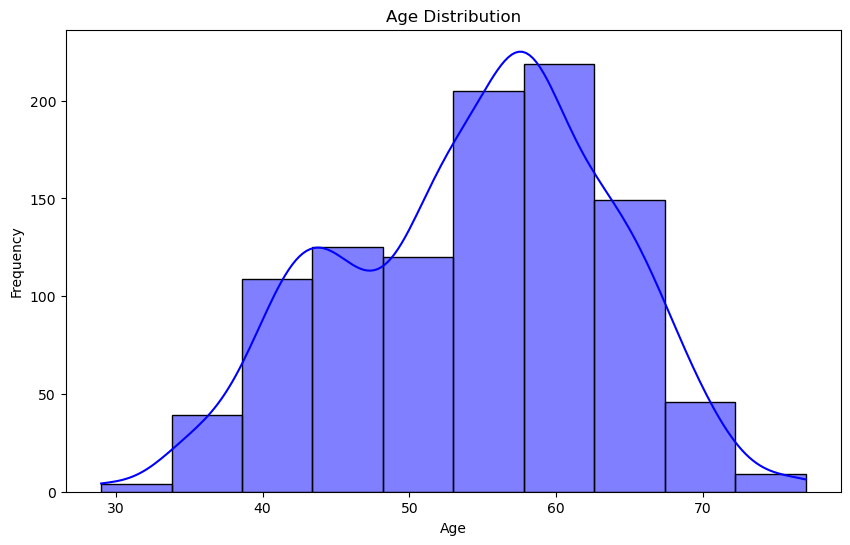

In [116]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(heart_df["age"], kde=True, bins=10, color="blue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_8996\2582143721.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(heart_df[heart_df["target"] == 0]["age"], label="No Disease", shade=True, color="red")
C:\Users\hp\AppData\Local\Temp\ipykernel_8996\2582143721.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(heart_df[heart_df["target"] == 1]["age"], label="Disease", shade=True, color="green")


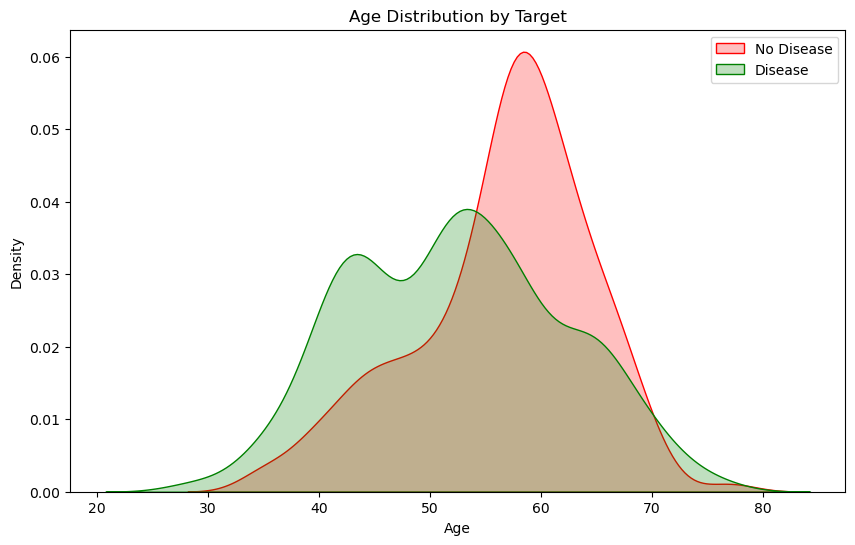

In [117]:

#Plot for Age by Target
plt.figure(figsize=(10, 6))
sns.kdeplot(heart_df[heart_df["target"] == 0]["age"], label="No Disease", shade=True, color="red")
sns.kdeplot(heart_df[heart_df["target"] == 1]["age"], label="Disease", shade=True, color="green")
plt.title("Age Distribution by Target")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()
plt.show()


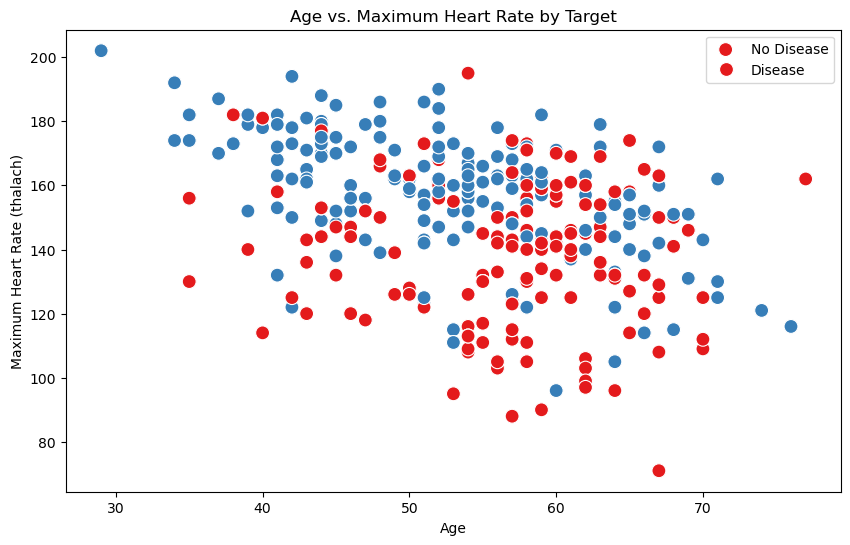

In [118]:
# Scatter Plot for Age vs. Maximum Heart Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x="age", y="thalach", hue="target", data=heart_df, palette="Set1", s=100)
plt.title("Age vs. Maximum Heart Rate by Target")
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate (thalach)")
plt.legend(["No Disease", "Disease"])
plt.show()

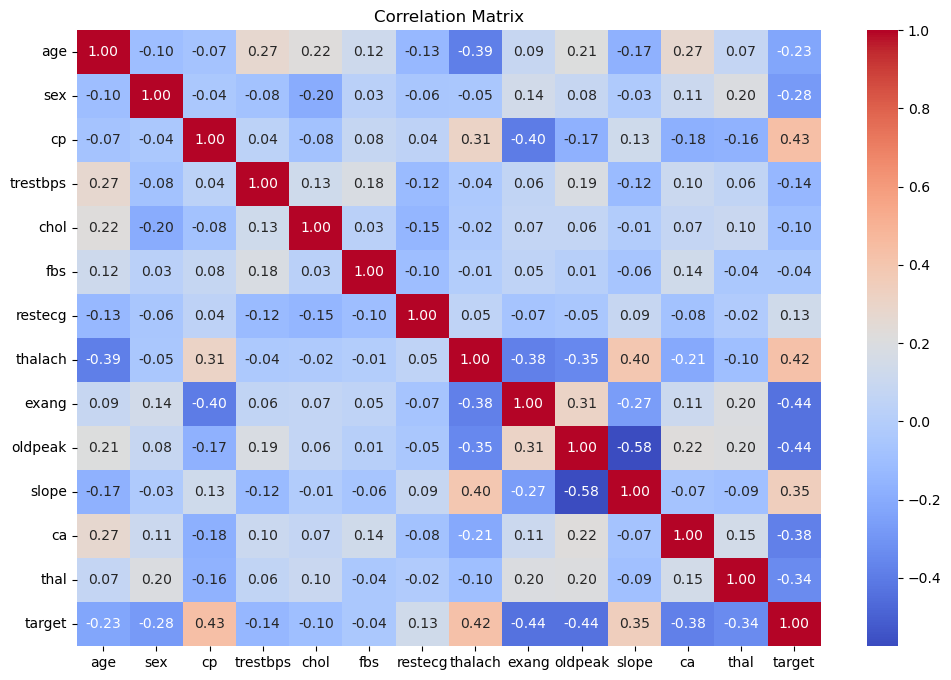

In [119]:
#  Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heart_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

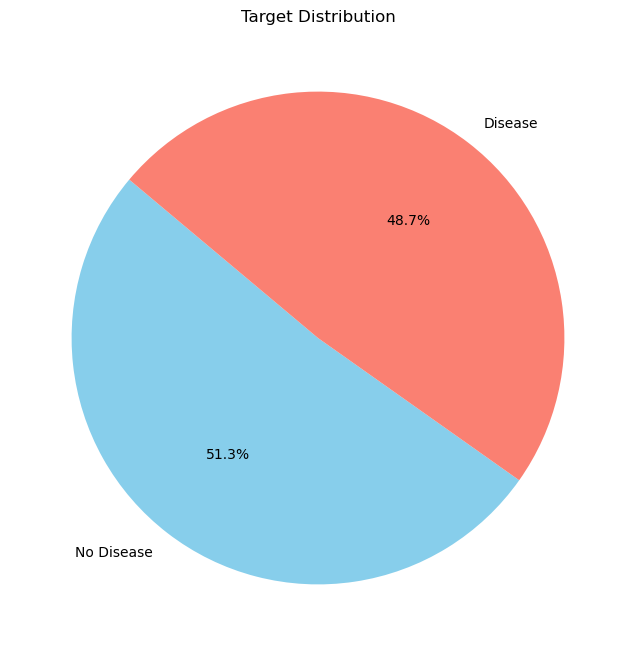

In [120]:
#  Pie Chart for Target Distribution
target_counts = heart_df["target"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(target_counts, labels=["No Disease", "Disease"], autopct='%1.1f%%', startangle=140, colors=["skyblue", "salmon"])
plt.title("Target Distribution")
plt.show() 

Preprocessing

In [121]:
# checking the distribution of Target Variable
heart_df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [122]:
#Splitting the Features and Target
x = heart_df.drop(columns='target', axis=1)
y = heart_df['target']

In [123]:
# Function to remove outliers using IQR
def remove_outliers_iqr(X):
    Q1 = X.quantile(0.25)
    Q3 = X.quantile(0.75)
    IQR = Q3 - Q1
    return X[~((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)]

In [124]:
# Remove outliers from feature
X_iqr = remove_outliers_iqr(x)

In [125]:
# Align y with the reduced X_iqr dataset
y_aligned = y[X_iqr.index]

In [126]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_iqr, y_aligned, test_size=0.3, random_state=42)

In [127]:
# print shapes of the datasets
print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Testing Target Shape: {y_test.shape}")

Training Features Shape: (538, 13)
Testing Features Shape: (231, 13)
Training Target Shape: (538,)
Testing Target Shape: (231,)


Modeling

In [128]:
heart_model = LogisticRegression()

In [129]:
# training the LogisticRegression model with Training data
heart_model.fit(X_train, y_train)

c:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [130]:
# accuracy on training data
X_train_prediction = heart_model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8847583643122676


Building a Predictive System

In [131]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = heart_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


c:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Saving the trained model

In [132]:
import pickle
# Save the model
filename = 'heart_disease_model.sav'
pickle.dump(heart_model, open(filename, 'wb'))

# Load the model
heart_disease_model = pickle.load(open(filename, 'rb'))
